## Visualising Luxembourg

Get statistics about Luxembourg and compare them to similar statistics about Switzerland:

https://statistiques.public.lu/en.html

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from mizani.formatters import comma_format
from janitor import clean_names

pd.set_option('display.max.columns', 500)

### Energy

#### Energy Market

In [2]:
data = (pd.read_csv("Energy/Electricity Market.csv")
        )

data = clean_names(data)

data.head()

,dataflow,freq_frequency,specification_specification,time_period_time_period,obs_value,obs_status_observation_status,decimals_decimals,note_year_2_note_year_2,note_year_1_note_year_1,note_specification_2_note_specification_2,note_specification_1_note_specification_1
0,LU1:DF_A4500(1.0),A: Annual,L03: Quantity of electricity sold (in MWh),2007,NaN,NaN,0: Zero,NaN,NaN,NaN,NaN
1,LU1:DF_A4500(1.0),A: Annual,L03: Quantity of electricity sold (in MWh),2008,NaN,NaN,0: Zero,NaN,NaN,NaN,NaN
2,LU1:DF_A4500(1.0),A: Annual,L03: Quantity of electricity sold (in MWh),2009,NaN,NaN,0: Zero,NaN,NaN,NaN,NaN
3,LU1:DF_A4500(1.0),A: Annual,L03: Quantity of electricity sold (in MWh),2010,NaN,NaN,0: Zero,NaN,NaN,NaN,NaN
4,LU1:DF_A4500(1.0),A: Annual,L03: Quantity of electricity sold (in MWh),2011,NaN,NaN,0: Zero,NaN,NaN,NaN,NaN


In [3]:
empty_groups = (data
                .obs_value
                .isnull()
                .groupby(data.specification_specification)
                .sum()
                .reset_index(name='na')
                .query('na > 0')
                ['specification_specification']
                .to_list()
                )

empty_groups

['L01: Lines lenght (in km)',
 'L02: Number of subscriptions',
 'L03: Quantity of electricity sold (in MWh)']

In [4]:
(data
 .query('specification_specification not in @empty_groups')
 .filter(['specification_specification', 'time_period_time_period', 'obs_value'])
 .reset_index()
 .head()
 )

,index,specification_specification,time_period_time_period,obs_value
0,30,SL06: Residential subscriptions,2007,836900.0
1,31,SL06: Residential subscriptions,2008,860500.0
2,32,SL06: Residential subscriptions,2009,896876.0
3,33,SL06: Residential subscriptions,2010,891227.0
4,34,SL06: Residential subscriptions,2011,895184.0


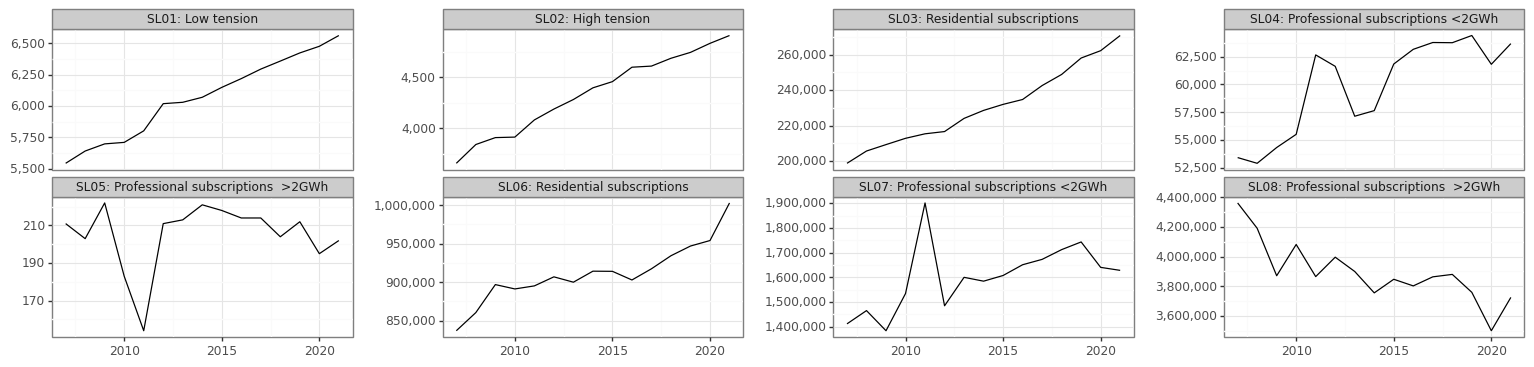

<ggplot: (107159974372)>

In [5]:
(
    ggplot(data=(data
                 .query('specification_specification not in @empty_groups')
                 .filter(['specification_specification', 'time_period_time_period', 'obs_value'])
                 .reset_index()),
           mapping=aes(x='time_period_time_period', y='obs_value')) +
    geom_line() +
    labs(y=None, x=None) +
    facet_wrap('~ specification_specification', scales='free_y', nrow=2) +
    scale_y_continuous(labels=comma_format()) +
    theme_bw() +
    theme(figure_size=[19, 4],
          subplots_adjust={'wspace': 0.3})
)


#### 

In [10]:
data = (pd.read_csv("Energy/Electricity Price Components (EUR per kWh).csv")
        )

data = (clean_names(data)
        .filter(['specification_specification', 'freq_frequency',
                'obs_value'])
        )

data.head()

,specification_specification,freq_frequency,obs_value
0,SSL02: VAT,A: Annual,0.0083
1,SSL02: VAT,A: Annual,0.0096
2,SSL02: VAT,A: Annual,0.0093
3,SSL02: VAT,A: Annual,0.0090
4,SSL02: VAT,A: Annual,0.0092


In [11]:
data.value_counts('specification_specification')

specification_specification
L01: Households                          42
L02: Professionnals                      42
SL01: Price without taxes and excises    42
SL02: Taxes and excises                  42
SL03: Price with taxes and excises       42
SL04: Price without taxes and excises    42
SL05: Taxes and excises                  42
SL06: Price with taxes and excises       42
SSL01: Excises                           42
SSL02: VAT                               42
SSL03: Excises                           42
SSL04: VAT                               42
dtype: int64

### Prices

In [ ]:
data = (pd.read_csv("Energy/Electricity Market.csv")
        )

data = clean_names(data)

### Tourism

### Weather